### Convert TSG and Flow Meter Data to Correct Format for Inline Analysis

This converts from Shearwater formats to InlineAnalysis formats

### First for the August Cruise

In [ ]:
TSG format is

lat=43 47.66737 N, lon=069 57.81890 W, hms=122029, dmy=040821, t1=18.254000, c1=4.118110, s=30.812400, sigma=22.007600

My TSG data is formatted as :
09/04/2021,22:57:51.709,        26.5469        36.0464      1539.56

    
My GPS data is:
09/04/2021,22:23:40.089,$GPZDA,222709.67,04,09,2021,00,00*67


#### Convert to proper format

In [39]:
import matplotlib.pyplot as plt


In [1]:
import pandas as pd

tsg_original = pd.read_csv('data/SW21009R_NRL/TSG/TSG-_20210825-082425.Raw', sep='        |,|      ', header=None, names=['date', 'time', 'delete', 'T', 'S', 'unknown'])

gps_original = pd.read_csv('data/SW21009R_NRL/Navigation/SW-GGA_20210825-082425.Raw', header=None,
                           names=['date', 'time', 'gps', 'unknown', 'latdms', 'lat_sign', 'londms', 'lon_sign', '1', '2', '3', '4', '5', '6', '7'])

<ipython-input-1-f6515d7470f1>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tsg_original = pd.read_csv('data/SW21009R_NRL/TSG/TSG-_20210825-082425.Raw', sep='        |,|      ', header=None, names=['date', 'time', 'delete', 'T', 'S', 'unknown'])


In [2]:
tsg_original['datetime'] = pd.to_datetime(tsg_original['date'] + ' ' + tsg_original['time'])

In [3]:
tsg_original = tsg_original.set_index('datetime')

In [4]:
tsg_original['datetime'] = pd.to_datetime(tsg_original['date'] + ' ' + tsg_original['time'])

In [5]:
tsg_original

,date,time,delete,T,S,unknown,datetime
datetime,,,,,,,
2021-08-25 08:24:35.600,08/25/2021,08:24:35.600,NaN,29.4365,0.2873,1509.65,2021-08-25 08:24:35.600
2021-08-25 08:24:45.596,08/25/2021,08:24:45.596,NaN,29.4352,0.2874,1509.65,2021-08-25 08:24:45.596
2021-08-25 08:24:55.599,08/25/2021,08:24:55.599,NaN,29.4351,0.2874,1509.65,2021-08-25 08:24:55.599
2021-08-25 08:25:05.594,08/25/2021,08:25:05.594,NaN,29.4339,0.2874,1509.64,2021-08-25 08:25:05.594
2021-08-25 08:25:15.597,08/25/2021,08:25:15.597,NaN,29.4330,0.2874,1509.64,2021-08-25 08:25:15.597
...,...,...,...,...,...,...,...
2021-08-30 07:05:09.026,08/30/2021,07:05:09.026,NaN,29.2768,35.7172,1545.11,2021-08-30 07:05:09.026
2021-08-30 07:05:19.032,08/30/2021,07:05:19.032,NaN,29.2765,35.7170,1545.11,2021-08-30 07:05:19.032
2021-08-30 07:05:29.039,08/30/2021,07:05:29.039,NaN,29.2757,35.7174,1545.11,2021-08-30 07:05:29.039


In [6]:
gps_original['datetime'] = pd.to_datetime(gps_original['date'] + ' ' + gps_original['time'])

In [7]:
gps_original = gps_original.set_index('datetime')

In [8]:
indices = []
for i in range(len(tsg_original)):
    indices.append(gps_original.index.get_loc(tsg_original.iloc[i].datetime, method='nearest'))

In [9]:
gps_subset = gps_original.iloc[indices]

In [10]:
import numpy as np

def dms2dd(degrees, minutes, seconds, direction):
    dd = degrees + minutes/60 + seconds/(60*60);
    if direction == 'W' or direction == 'S':
        dd *= -1
    return dd;

gps_subset['lon'] = dms2dd(pd.to_numeric(gps_subset['londms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['londms'].astype(str).str[2:]),np.array(0), 'W')
gps_subset['lat'] = dms2dd(pd.to_numeric(gps_subset['latdms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['latdms'].astype(str).str[2:]),np.array(0), 'E')

<ipython-input-10-9342abf7a88e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_subset['lon'] = dms2dd(pd.to_numeric(gps_subset['londms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['londms'].astype(str).str[2:]),np.array(0), 'W')
<ipython-input-10-9342abf7a88e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_subset['lat'] = dms2dd(pd.to_numeric(gps_subset['latdms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['latdms'].astype(str).str[2:]),np.array(0), 'E')


In [11]:
gps_subset.head()

,date,time,gps,unknown,latdms,lat_sign,londms,lon_sign,1,2,3,4,5,6,7,lon,lat
datetime,,,,,,,,,,,,,,,,,
2021-08-25 08:24:35.646,08/25/2021,08:24:35.646,$GPGGA,82746.72,3443.0547,N,7640.2342,W,2,28,0.5,-28.4,M,-36.8,M*4F,-76.670570,34.717578
2021-08-25 08:24:45.877,08/25/2021,08:24:45.877,$GPGGA,82757.00,3443.0547,N,7640.2340,W,2,29,0.5,-28.5,M,-36.8,M*66,-76.670567,34.717578
2021-08-25 08:24:55.748,08/25/2021,08:24:55.748,$GPGGA,82806.70,3443.0549,N,7640.2338,W,2,28,0.5,-28.6,M,-36.8,M*77,-76.670563,34.717582
2021-08-25 08:25:06.135,08/25/2021,08:25:06.135,$GPGGA,82816.69,3443.0548,N,7640.2341,W,2,29,0.5,-28.4,M,-36.8,M*42,-76.670568,34.717580
2021-08-25 08:25:15.785,08/25/2021,08:25:15.785,$GPGGA,82826.69,3443.0547,N,7640.2344,W,2,29,0.5,-28.4,M,-36.8,M*4B,-76.670573,34.717578


In [12]:
tsg_original['latdms'] = gps_subset['latdms'].values
tsg_original['londms'] = gps_subset['londms'].values

In [ ]:
lat=43 47.66737 N, lon=069 57.81890 W, hms=122029, dmy=040821, t1=18.254000, c1=4.118110, s=30.812400, sigma=22.007600

In [13]:
tsg_original.iloc[1].datetime.strftime('%H%M%S') # %d/%m/%y

'082445'

In [15]:
tsg_original.iloc[1].datetime.strftime('%d%m%y')

'250821'

In [16]:
tsg_original.iloc[1]['T']

29.4352

In [17]:
f = open('tsg_20210825.txt', 'w')
i=0
for index, row in tsg_original.iterrows():
    if i > len(tsg_original):
        break
    else:
        f.write('lat='+str(row['latdms'])[:2]+' '+str(row['latdms'])[2:]+' N, ')
        f.write('lon=0'+str(row['latdms'])[:2]+' '+str(row['latdms'])[2:]+' W, ')
        f.write('hms='+row.datetime.strftime('%H%M%S')+', ')
        f.write('dmy='+row.datetime.strftime('%d%m%y')+', ')
        f.write('t1='+str(row['T'])+', ')
        f.write('c1=0, ')
        f.write('s='+str(row['S'])+', ')
        f.write('sigma=0\n')
        i+=1
f.close()

### Converting flow control to proper format

proper format is 
2021-08-04 19:00:01 UTC	1	0110	0.00	43.48	0.000	2.469
        
my format is
09/04/2021,22:23:38.407,$FLOW,0,mL/s

In [18]:
flow_df = pd.read_csv('data/SW21009R_NRL/TSG/FlowMeter-_20210825-082425.Raw', header=None, names=['date', 'time', 'flowname', 'flow', 'units'])

In [19]:
flow_df

,date,time,flowname,flow,units
0,08/25/2021,08:24:26.861,$FLOW,0.0,mL/s
1,08/25/2021,08:24:27.869,$FLOW,0.0,mL/s
2,08/25/2021,08:24:28.869,$FLOW,0.0,mL/s
3,08/25/2021,08:24:29.881,$FLOW,0.0,mL/s
4,08/25/2021,08:24:30.881,$FLOW,0.0,mL/s
...,...,...,...,...,...
423702,08/30/2021,07:05:49.421,$FLOW,0.0,mL/s
423703,08/30/2021,07:05:50.430,$FLOW,0.0,mL/s
423704,08/30/2021,07:05:51.439,$FLOW,0.0,mL/s
423705,08/30/2021,07:05:52.448,$FLOW,0.0,mL/s


In [20]:
flow_df['datetime'] = pd.to_datetime(flow_df.date + ' ' + flow_df.time)

In [21]:
flow_df.head()

,date,time,flowname,flow,units,datetime
0,08/25/2021,08:24:26.861,$FLOW,0.0,mL/s,2021-08-25 08:24:26.861
1,08/25/2021,08:24:27.869,$FLOW,0.0,mL/s,2021-08-25 08:24:27.869
2,08/25/2021,08:24:28.869,$FLOW,0.0,mL/s,2021-08-25 08:24:28.869
3,08/25/2021,08:24:29.881,$FLOW,0.0,mL/s,2021-08-25 08:24:29.881
4,08/25/2021,08:24:30.881,$FLOW,0.0,mL/s,2021-08-25 08:24:30.881


In [ ]:
2021-08-04 19:00:01 UTC	1	0110	0.00	43.48	0.000	2.469
2021-09-04 22:23:38 UTC	1	0110	0.00	50.0	0.00	0.0

In [22]:
flow_df.iloc[10].datetime.strftime('%H:%M:%S')

'08:24:36'

In [23]:
flow_df.iloc[10].datetime.strftime('%Y-%m-%d')

'2021-08-25'

In [24]:
f = open('Flow_20210825.txt', 'w')
i=0
for index, row in flow_df.iterrows():
    if i > len(flow_df):
        break
    else:
        f.write(row.datetime.strftime('%Y-%m-%d')+' '+row.datetime.strftime('%H:%M:%S')+' ')
        f.write('UTC\t1\t')
        f.write('0110\t0.00\t')
        f.write(str(row['flow']*60/1000)+'\t')
        f.write('0.00\t')
        f.write('0.00\n')
        
        i+=1
f.close()

We also need to format the CDOM into the proper inlinino format

In [25]:
txt_file = open('data/augcruise/cdom_flu_output_210829_1.txt', 'r')

In [26]:
lines = txt_file.readlines()

In [31]:
sensor_values = []
utc_times = []
for i in range(len(lines)):
    line = lines[i]
    if "sensor" in line:
        try:
            line = line.split('= ')[1]
            line = line.replace('\n', '')
            if "UTC" in lines[i-1]:
                sensor_values.append(int(line))
                data_time = lines[i-1][5:-2]
                utc_times.append(data_time)
        except:
            pass

In [32]:
len(sensor_values)-len(utc_times)

0

In [33]:
utc_times = pd.to_datetime(utc_times)

In [34]:
utc_times

DatetimeIndex(['2021-08-29 10:42:47.538120', '2021-08-29 10:42:48.043820',
               '2021-08-29 10:42:48.546540', '2021-08-29 10:42:49.047680',
               '2021-08-29 10:42:49.551880', '2021-08-29 10:42:50.055540',
               '2021-08-29 10:42:50.555840', '2021-08-29 10:42:51.056040',
               '2021-08-29 10:42:51.558030', '2021-08-29 10:42:52.059950',
               ...
               '2021-08-30 05:14:07.042540', '2021-08-30 05:14:07.545040',
               '2021-08-30 05:14:08.047120', '2021-08-30 05:14:08.547450',
               '2021-08-30 05:14:09.049240', '2021-08-30 05:14:09.552950',
               '2021-08-30 05:14:10.057330', '2021-08-30 05:14:10.558430',
               '2021-08-30 05:14:11.062740', '2021-08-30 05:14:11.568110'],
              dtype='datetime64[ns]', length=128160, freq=None)

In [35]:
cdom_df = pd.DataFrame(np.array(sensor_values)/1024.0*5, columns = ['cdom_volts'])

In [36]:
cdom_df['sample_times'] = utc_times

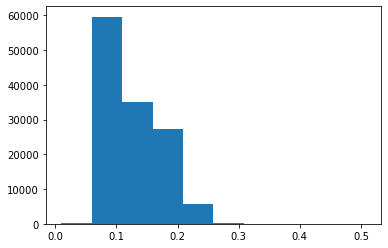

In [40]:
plt.hist(cdom_df.cdom_volts)
plt.show()

(0.0, 0.32)

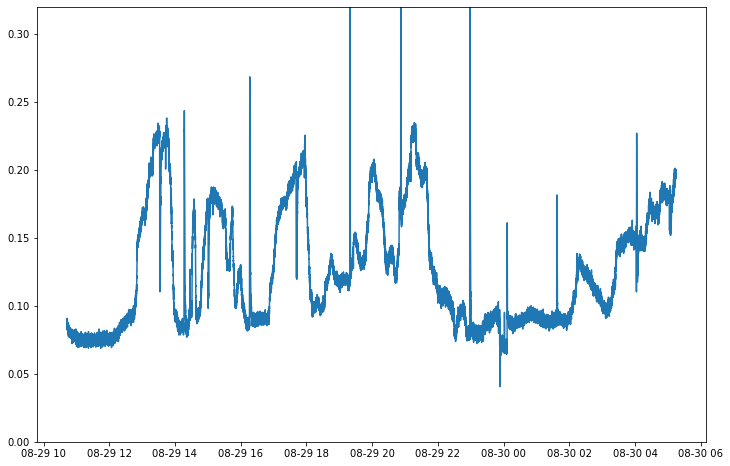

In [43]:
fig, ax = plt.subplots(figsize=(12,8))
# cdom_df.rolling(window=120).median().plot(x='sample_times', y='cdom_volts', ax=ax)
ax.plot(cdom_df.sample_times, cdom_df.rolling(window=10).mean())
ax.set_ylim(0.0,0.32)

In [ ]:
format is 
time, C1
yyyy/mm/dd HH:MM:SS.fff, V
2021/09/06 01:00:01.149, 0.153

In [62]:
cdom_df.iloc[1000].sample_times.strftime('%Y/%m/%d %H:%M:%S.%f')[:-3]

'2021/08/29 10:51:27.332'

In [63]:
f = open('WSCD859_20210829_000000.csv', 'w')
i=0
f.write('time, C1\n')
f.write('yyyy/mm/dd HH:MM:SS.fff, V\n')
for index, row in cdom_df.iterrows():
    if i > len(cdom_df):
        break
    else:
        f.write(row.sample_times.strftime('%Y/%m/%d %H:%M:%S.%f')[:-3]+', '+str(row['cdom_volts'])[:5]+'\n')
        i+=1
f.close()

### Now let's do it for the Sept Cruise

In [ ]:
TSG format is

lat=43 47.66737 N, lon=069 57.81890 W, hms=122029, dmy=040821, t1=18.254000, c1=4.118110, s=30.812400, sigma=22.007600

My TSG data is formatted as :
09/04/2021,22:57:51.709,        26.5469        36.0464      1539.56

    
My GPS data is:
09/04/2021,22:23:40.089,$GPZDA,222709.67,04,09,2021,00,00*67


#### Convert to proper format

In [65]:
import pandas as pd

tsg_original = pd.read_csv('data/SW21011R_RFP/TSG/TSG-_20210904-222337.Raw', sep='        |,|      ', header=None, names=['date', 'time', 'delete', 'T', 'S', 'unknown'])

gps_original = pd.read_csv('data/SW21011R_RFP/Navigation/SW-GGA_20210904-222337.Raw', header=None,
                           names=['date', 'time', 'gps', 'unknown', 'latdms', 'lat_sign', 'londms', 'lon_sign', '1', '2', '3', '4', '5', '6', '7'])

<ipython-input-65-12db4bb59c4b>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  tsg_original = pd.read_csv('data/SW21011R_RFP/TSG/TSG-_20210904-222337.Raw', sep='        |,|      ', header=None, names=['date', 'time', 'delete', 'T', 'S', 'unknown'])


In [66]:
tsg_original['datetime'] = pd.to_datetime(tsg_original['date'] + ' ' + tsg_original['time'])

In [67]:
tsg_original = tsg_original.set_index('datetime')

In [68]:
tsg_original['datetime'] = pd.to_datetime(tsg_original['date'] + ' ' + tsg_original['time'])

In [69]:
tsg_original

,date,time,delete,T,S,unknown,datetime
datetime,,,,,,,
2021-09-04 22:57:51.709,09/04/2021,22:57:51.709,NaN,26.5469,36.0464,1539.56,2021-09-04 22:57:51.709
2021-09-04 22:58:01.635,09/04/2021,22:58:01.635,NaN,26.5226,36.0374,1539.49,2021-09-04 22:58:01.635
2021-09-04 22:58:11.623,09/04/2021,22:58:11.623,NaN,26.4849,36.0074,1539.38,2021-09-04 22:58:11.623
2021-09-04 22:58:21.627,09/04/2021,22:58:21.627,NaN,26.4642,35.9757,1539.30,2021-09-04 22:58:21.627
2021-09-04 22:58:31.627,09/04/2021,22:58:31.627,NaN,26.4588,35.9478,1539.25,2021-09-04 22:58:31.627
...,...,...,...,...,...,...,...
2021-09-09 12:00:14.732,09/09/2021,12:00:14.732,NaN,27.4096,35.8314,1541.24,2021-09-09 12:00:14.732
2021-09-09 12:00:24.733,09/09/2021,12:00:24.733,NaN,27.4104,35.8320,1541.24,2021-09-09 12:00:24.733
2021-09-09 12:00:34.724,09/09/2021,12:00:34.724,NaN,27.4130,35.8316,1541.24,2021-09-09 12:00:34.724


In [70]:
gps_original['datetime'] = pd.to_datetime(gps_original['date'] + ' ' + gps_original['time'])

In [71]:
gps_original = gps_original.set_index('datetime')

In [72]:
indices = []
for i in range(len(tsg_original)):
    indices.append(gps_original.index.get_loc(tsg_original.iloc[i].datetime, method='nearest'))

In [73]:
gps_subset = gps_original.iloc[indices]

In [74]:
import numpy as np

def dms2dd(degrees, minutes, seconds, direction):
    dd = degrees + minutes/60 + seconds/(60*60);
    if direction == 'W' or direction == 'S':
        dd *= -1
    return dd;

gps_subset['lon'] = dms2dd(pd.to_numeric(gps_subset['londms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['londms'].astype(str).str[2:]),np.array(0), 'W')
gps_subset['lat'] = dms2dd(pd.to_numeric(gps_subset['latdms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['latdms'].astype(str).str[2:]),np.array(0), 'E')

<ipython-input-74-9342abf7a88e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_subset['lon'] = dms2dd(pd.to_numeric(gps_subset['londms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['londms'].astype(str).str[2:]),np.array(0), 'W')
<ipython-input-74-9342abf7a88e>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gps_subset['lat'] = dms2dd(pd.to_numeric(gps_subset['latdms'].astype(str).str[:2]).astype(float), pd.to_numeric(gps_subset['latdms'].astype(str).str[2:]),np.array(0), 'E')


In [75]:
gps_subset.head()

,date,time,gps,unknown,latdms,lat_sign,londms,lon_sign,1,2,3,4,5,6,7,lon,lat
datetime,,,,,,,,,,,,,,,,,
2021-09-04 22:57:51.969,09/04/2021,22:57:51.969,$GPGGA,230114.00,3438.1081,N,7639.5340,W,2,28,0.5,-27.0,M,-36.9,M*73,-76.658900,34.635135
2021-09-04 22:58:01.949,09/04/2021,22:58:01.949,$GPGGA,230123.68,3438.0566,N,7639.5045,W,2,28,0.5,-26.4,M,-36.9,M*47,-76.658408,34.634277
2021-09-04 22:58:12.102,09/04/2021,22:58:12.102,$GPGGA,230133.68,3438.0046,N,7639.4760,W,2,28,0.5,-26.6,M,-36.9,M*42,-76.657933,34.633410
2021-09-04 22:58:21.706,09/04/2021,22:58:21.706,$GPGGA,230143.69,3437.9533,N,7639.4463,W,2,27,0.5,-27.2,M,-36.9,M*4F,-76.657438,34.632555
2021-09-04 22:58:31.002,09/04/2021,22:58:31.002,$GPGGA,230152.69,3437.9070,N,7639.4200,W,2,27,0.5,-27.0,M,-36.9,M*52,-76.657000,34.631783


In [76]:
tsg_original['latdms'] = gps_subset['latdms'].values
tsg_original['londms'] = gps_subset['londms'].values

In [ ]:
lat=43 47.66737 N, lon=069 57.81890 W, hms=122029, dmy=040821, t1=18.254000, c1=4.118110, s=30.812400, sigma=22.007600

In [105]:
tsg_original.iloc[1].datetime.strftime('%H%M%S') # %d/%m/%y

'225801'

In [113]:
row.datetime.strftime('%d%m%y')

'040921'

In [115]:
row['T']

26.5469

In [122]:
f = open('tsg_20210904.txt', 'w')
i=0
for index, row in tsg_original.iterrows():
    if i > len(tsg_original):
        break
    else:
        f.write('lat='+str(row['latdms'])[:2]+' '+str(row['latdms'])[2:]+' N, ')
        f.write('lon=0'+str(row['latdms'])[:2]+' '+str(row['latdms'])[2:]+' W, ')
        f.write('hms='+row.datetime.strftime('%H%M%S')+', ')
        f.write('dmy='+row.datetime.strftime('%d%m%y')+', ')
        f.write('t1='+str(row['T'])+', ')
        f.write('c1=0, ')
        f.write('s='+str(row['S'])+', ')
        f.write('sigma=0\n')
        i+=1
f.close()

### Converting flow control to proper format

proper format is 
2021-08-04 19:00:01 UTC	1	0110	0.00	43.48	0.000	2.469
        
my format is
09/04/2021,22:23:38.407,$FLOW,0,mL/s

In [127]:
flow_df = pd.read_csv('data/SW21011R_RFP/TSG/FlowMeter-_20210904-222337.Raw', header=None, names=['date', 'time', 'flowname', 'flow', 'units'])

In [128]:
flow_df

,date,time,flowname,flow,units
0,09/04/2021,22:23:38.407,$FLOW,0.0,mL/s
1,09/04/2021,22:23:39.415,$FLOW,0.0,mL/s
2,09/04/2021,22:23:40.418,$FLOW,0.0,mL/s
3,09/04/2021,22:23:41.431,$FLOW,0.0,mL/s
4,09/04/2021,22:23:42.433,$FLOW,0.0,mL/s
...,...,...,...,...,...
389779,09/09/2021,12:01:10.306,$FLOW,0.0,mL/s
389780,09/09/2021,12:01:11.313,$FLOW,0.0,mL/s
389781,09/09/2021,12:01:12.318,$FLOW,0.0,mL/s
389782,09/09/2021,12:01:13.324,$FLOW,0.0,mL/s


In [130]:
flow_df['datetime'] = pd.to_datetime(flow_df.date + ' ' + flow_df.time)

In [131]:
flow_df.head()

,date,time,flowname,flow,units,datetime
0,09/04/2021,22:23:38.407,$FLOW,0.0,mL/s,2021-09-04 22:23:38.407
1,09/04/2021,22:23:39.415,$FLOW,0.0,mL/s,2021-09-04 22:23:39.415
2,09/04/2021,22:23:40.418,$FLOW,0.0,mL/s,2021-09-04 22:23:40.418
3,09/04/2021,22:23:41.431,$FLOW,0.0,mL/s,2021-09-04 22:23:41.431
4,09/04/2021,22:23:42.433,$FLOW,0.0,mL/s,2021-09-04 22:23:42.433


In [ ]:
2021-08-04 19:00:01 UTC	1	0110	0.00	43.48	0.000	2.469
2021-09-04 22:23:38 UTC	1	0110	0.00	50.0	0.00	0.0

In [132]:
flow_df.iloc[10].datetime.strftime('%H:%M:%S')

'22:23:48'

In [144]:
flow_df.iloc[10].datetime.strftime('%Y-%m-%d')

'2021-09-04'

1.05

In [151]:
f = open('Flow_20210904.txt', 'w')
i=0
for index, row in flow_df.iterrows():
    if i > len(flow_df):
        break
    else:
        f.write(row.datetime.strftime('%Y-%m-%d')+' '+row.datetime.strftime('%H:%M:%S')+' ')
        f.write('UTC\t1\t')
        f.write('0110\t0.00\t')
        f.write(str(row['flow']*60/1000)+'\t')
        f.write('0.00\t')
        f.write('0.00\n')
        
        i+=1
f.close()